In [28]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [29]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [30]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [31]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [32]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(autoload_with=engine)

In [33]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [34]:
# Save references to each table
measurement, station = Base.classes

In [35]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [36]:
# Find the most recent date in the data set.
recent_date = session.query(measurement).order_by(measurement.date).all()[-1]
recent_date.__dict__['date']

'2017-08-23'

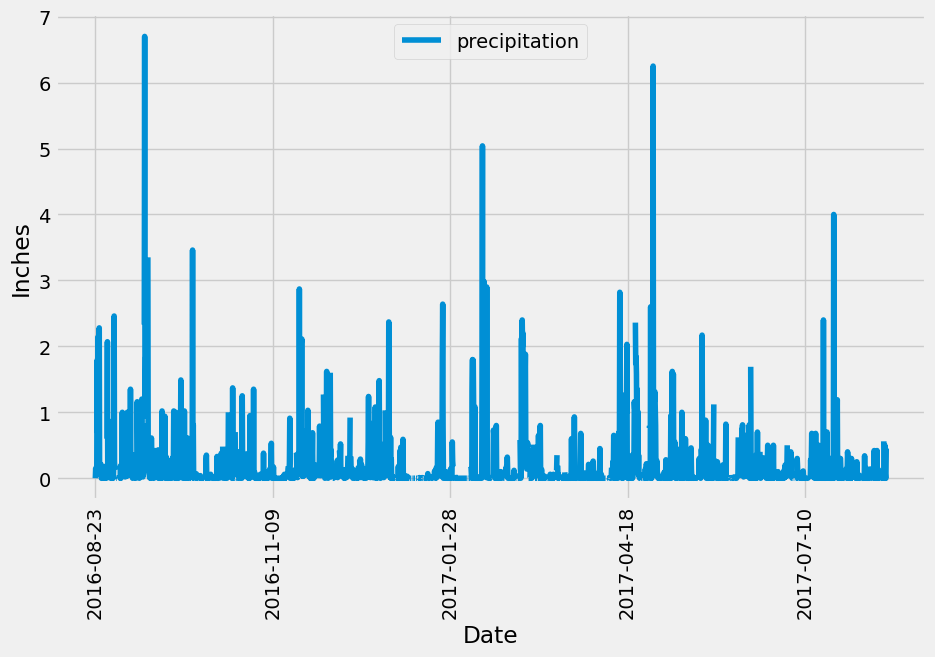

In [52]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the latest date
one_year_ago = (pd.to_datetime(recent_date.__dict__['date']) - pd.DateOffset(days=365)).strftime('%Y-%m-%d')
one_year_ago

# # Perform a query to retrieve the data and precipitation scores
precipitation_data = session.query(measurement.date, measurement.prcp).\
    filter(measurement.date >= one_year_ago).\
    order_by(measurement.date).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
column_names = ['date', 'precipitation']
precipitation_df = pd.DataFrame(precipitation_data, columns=column_names)

# Sort the dataframe by date
precipitation_df = precipitation_df.sort_values(by='date')

# Use Pandas Plotting with Matplotlib to plot the data
precipitation_df.plot(x='date', y='precipitation', figsize=(10, 6), legend=False)
plt.xlabel('Date')
plt.ylabel('Inches')
plt.xticks(rotation=90)
plt.tight_layout()
plt.legend(['precipitation'], loc='upper center')
plt.show()

In [55]:
# Use Pandas to calculate the summary statistics for the precipitation data
summary_statistics = precipitation_df['precipitation'].describe()
summary_df = pd.DataFrame(summary_statistics)
summary_df

precipitation
count    2021.000000
mean        0.177279
std         0.461190
min         0.000000
25%         0.000000
50%         0.020000
75%         0.130000
max         6.700000

# Exploratory Station Analysis

In [59]:
# Design a query to calculate the total number of stations in the dataset
total_stations = session.query(station).count()
total_stations

9

In [61]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.

active_stations = session.query(measurement.station, func.count(measurement.station)).\
    group_by(measurement.station).\
    order_by(func.count(measurement.station).desc()).all()
active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [84]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.

# Most active station id from the previous query
most_active_station_id = active_stations[0][0]

# Query to calculate the lowest, highest, and average temperature.
temperature_info = session.query(func.min(measurement.tobs), func.max(measurement.tobs), func.avg(measurement.tobs)).\
    filter(measurement.station == most_active_station_id).all()
temperature_info

[(54.0, 85.0, 71.66378066378067)]

Text(0.5, 0, 'Temperature')


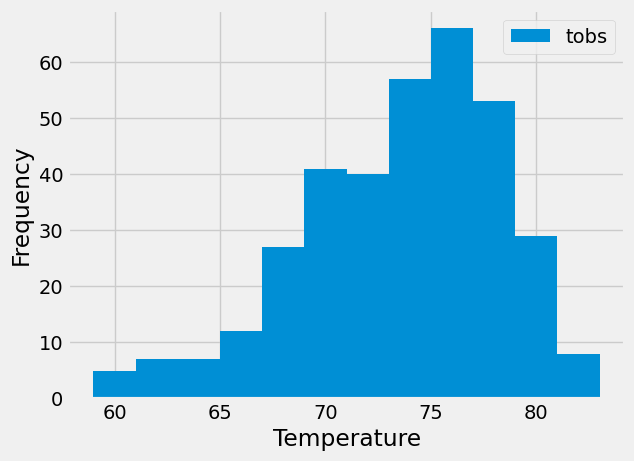

In [85]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
temperature_data = session.query(measurement.tobs).\
    filter(measurement.station == most_active_station_id, measurement.date >= one_year_ago).all()

# Convert the result to a list for plotting
temperature_list = [temp[0] for temp in temperature_data]

# Plot the histogram
plt.hist(temperature_list, bins=12, label='tobs')
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.legend()
print(plt.xlabel('Temperature'))
plt.show()

# Close Session

In [86]:
# Close Session
session.close()